#Importando Bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Trabalhando as imagens

In [117]:
imagem_zoio = '/home/rafaelfabrichimidt/Documentos/projetos/processamento_imagens_digitais/Aula 2/c.jpg' 

In [118]:
img_1 = cv2.imread(imagem_zoio)

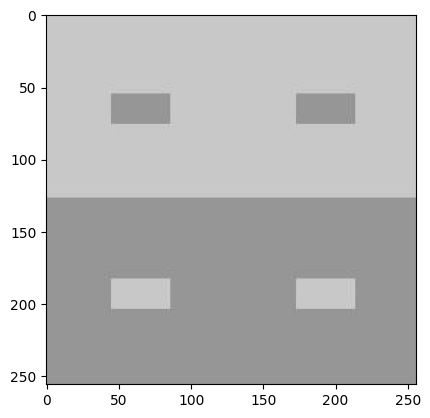

In [119]:
plt.imshow(img_1)

In [120]:
img_1.shape

(256, 256, 3)

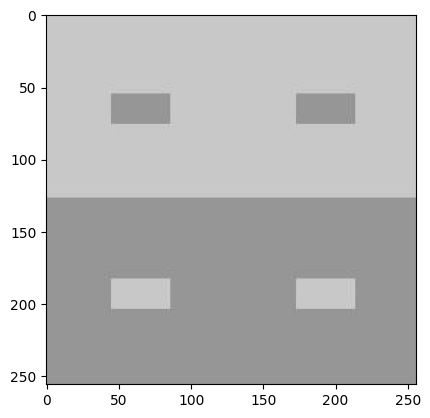

In [121]:
plt.imshow(img_1)

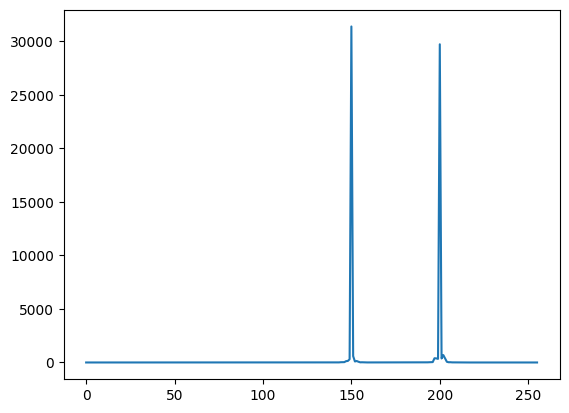

In [122]:
histogram = cv2.calcHist([img_1], [0], None, [256], [0, 256])

plt.plot(histogram)

#Taxa de Amostragem e Profundidade

In [123]:
#Encontrando a taxa de amostragem da imagem

img_cinza = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

img_cinza_array = np.array(img_cinza)

sampling_rate = img_cinza_array.shape

print(sampling_rate)

(256, 256)


In [124]:
img_cinza_array.dtype

dtype('uint8')

#Imagem Binária

In [125]:
img_1binaria = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

img_1binaria_ = cv2.threshold(img_1binaria, 150, 200, cv2.THRESH_BINARY)[1]

img_1array = np.array(img_1binaria_)

print(img_1array)

[[200 200 200 ... 200 200 200]
 [200 200 200 ... 200 200 200]
 [200 200 200 ... 200 200 200]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [126]:
img_1array[img_1array >= 200] = 255
img_1array[img_1array < 200] = 0

print(img_1array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


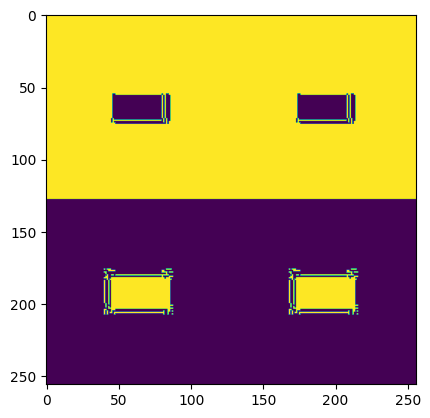

In [127]:
img_binarizada = img_1array

plt.imshow(img_binarizada)

In [128]:
print(img_binarizada)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
for i in range(0, img_binarizada.shape[0], 1):
    for j in range(0, img_binarizada.shape[1], 1):
        
        print(f' posicao [{i}, {j}] = {img_binarizada[i][j]} ')

In [ ]:
for i in range(0, img_binarizada.shape[0], 1):
    for j in range(0, img_binarizada.shape[1], 1):
        print(f' posicao [{i}, {j}] = {img_binarizada[i][j]} ')
        print(f'vizinhos - top [{i-1}, {j}] , bottom [{i+1}, {j}] , left [{i}, {j-1}] , right [{i}, {j+1}] ')

In [ ]:
for i in range(0, img_binarizada.shape[0], 1):
    for j in range(0, img_binarizada.shape[1], 1):
        print(f' posicao [{i}, {j}] = {img_binarizada[i][j]} \n')

        # verificando vizinho superior
        if ( (i - 1) >= 0 ):
            print(f'posicao [{i-1}, {j}]')

        #verificando vizinho inferior
        if ( (i + 1) < 256 ):
            print(f'posicao [{i+1}, {j}]')

        #verificando vizinho a esquerda
        if ( (j - 1) >= 0 ):
            print(f'posicao [{i}, {j-1}]')

        #verificando vizinho a esquerda
        if ( (j + 1) < 256 ):
            print(f'posicao [{i}, {j+1}]')

        print('\n')

In [134]:
labels = np.zeros((256,256))
label = 0
for i in range(0, img_binarizada.shape[0], 1):
    
    for j in range(0, img_binarizada.shape[1], 1):

        contador = {'centro' : 0,'top' : 0, 'bottom' : 0, 'left' : 0, 'right' : 0}

        #Verificar se indice atual esta ocupado
        if img_binarizada[i][j] != 0:
            contador['centro'] = 1
            
    
            # verificando vizinho superior
            if ( (i - 1) >= 0 ):
                #print(f'posicao [{i-1}, {j}]')
                if int(img_binarizada[i - 1][j]) != 0:
                    contador['top'] = 1
                    
            #verificando vizinho inferior
            # if ( (i + 1) < 256 ):
            #     #print(f'posicao [{i+1}, {j}]')
            #     if int(img_binarizada[i + 1][j]) == 0:
            #         contador['bottom'] = 1 
    
            #verificando vizinho a esquerda
            if ( (j - 1) >= 0 ):
                if int(img_binarizada[i][j - 1]) != 0:
                    contador['left'] = 1

                #print(f'posicao [{i}, {j-1}]')
    
            #verificando vizinho a direita
            # if ( (j + 1) < 256 ):
            #     #print(f'posicao [{i}, {j+1}]')
            #     contador['right'] = 1

        #possui vizinhos preenchidos
        if sum(contador.values()) > 0:
            #print('a')
            if labels[i - 1, j] != 0:
                #print('b')
                labels[i,j] = int(labels[i - 1, j]) 
                #print(labels[i,j])
                if labels[i - 1, j] < label:
                    labels[labels == (label)] = labels[i - 1, j] 
                #labels[labels == (label - 1)] = labels[i - 1, j] 
            elif labels[i, j - 1] != 0:
                #print('c')
                #print(labels[i, j - 1] )
                labels[i,j] = labels[i, j - 1] 
                if labels[i, j - 1] < label:
                    labels[labels == (label)] = labels[i - 1, j] 
                #labels[labels == (label - 1)] = labels[i, j - 1] 
            else:
                print(f' posicao [{i}, {j}] \n')
                print('d')
                print(img_binarizada[i][j])
                label = label + 1
                print(label)
                labels[i,j] = label
            
            


 posicao [0, 0] 

d
255
1
 posicao [56, 80] 

d
255
2
 posicao [56, 208] 

d
255
3
 posicao [72, 46] 

d
255
4
 posicao [72, 81] 

d
255
5
 posicao [72, 83] 

d
255
6
 posicao [72, 174] 

d
255
7
 posicao [72, 209] 

d
255
8
 posicao [72, 211] 

d
255
9
 posicao [74, 85] 

d
255
10
 posicao [74, 213] 

d
255
11
 posicao [176, 40] 

d
255
12
 posicao [176, 42] 

d
255
13
 posicao [176, 83] 

d
255
14
 posicao [176, 168] 

d
255
15
 posicao [176, 170] 

d
255
16
 posicao [176, 211] 

d
255
17
 posicao [177, 80] 

d
255
18
 posicao [177, 208] 

d
255
19
 posicao [178, 40] 

d
255
20
 posicao [178, 85] 

d
255
21
 posicao [178, 168] 

d
255
22
 posicao [178, 213] 

d
255
23
 posicao [180, 42] 

d
255
24
 posicao [180, 45] 

d
255
25
 posicao [180, 48] 

d
255
26
 posicao [180, 170] 

d
255
27
 posicao [180, 173] 

d
255
28
 posicao [180, 176] 

d
255
29
 posicao [181, 41] 

d
255
30
 posicao [181, 85] 

d
255
31
 posicao [181, 169] 

d
255
32
 posicao [181, 213] 

d
255
33
 posicao [182, 4

In [135]:
img_binarizada[56,81]

np.uint8(0)

In [93]:
labels

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
img_binarizada

In [70]:
labels[i - 1, j] 

np.float64(0.0)

In [94]:
np.unique(labels)

array([ 0.,  1.,  4.,  5.,  7.,  8., 12., 13., 14., 15., 16., 19., 21.,
       24., 25., 27., 28., 31., 33., 42., 44., 63.])

In [81]:
labels

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
contador = {'top' : 0, 'bottom' : 0, 'left' : 0, 'right' : 0}


0

In [58]:
x = np.array([0,1,2,3,4])

x[x==2] = 10

print(x)

[ 0  1 10  3  4]


In [44]:
int(img_binarizada[1,1])

255